## Python statistics essential training - 04_03_bootstrapping

In [1]:
#meta 4/19/2020
#Ch4. Statistical Inference
#my code and solution code bits

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

# Statistical Inference

# Bootstrapping

Scenario: A year after Mayor Green is elected, she embarks on a series of very contentious reforms. There are doubts as to the level of support that the citizen have in her. In your job at the newspaper, you're still covering politics, so you prepare to do another poll. 

## 0. Load Data
This time, you ask the people you interview to give the mayor a grade between 0 and 10. You're feeling lazy, so you take only 100 samples.


In [5]:
pop = pd.read_csv('lynda_data/grades.csv')
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


## 1. Analyze 
So we look at the histogram, and describe the sample with summary statistics. 

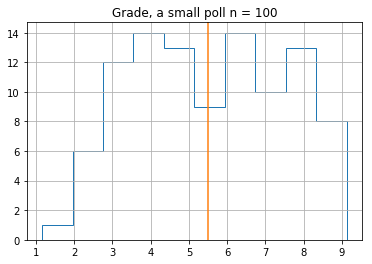

In [6]:
pop.grade.hist(histtype='step')
plt.title("Grade, a small poll n = 100")
plt.axvline(pop.grade.mean(),color='C1')
plt.draw()

In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


The histogram has no recognizable simple form, but the mean for the sample is 5.5. What can we say about the true mean value? This time we cannot build a confidence interval by simulating the sampling distribution because we do not know how to describe it.  Given the observed histogram, it is unlikely that it has a simple form such as a normal distribution. 

## Bootstrapping
However, we can still use computing by adopting a powerful idea in modern statistics, bootstrapping (introduced by Efron in 1979). What we'll do is to estimate the uncertainty of our statistic, the mean, by generating a large family of samples from the one we have. And then, characterizing the distribution of the mean over this family.

Each sample in the family is prepared as follows: we draw grades randomly for our single existing sample allowing the same grade to be drawn more than once. Technically speaking, we are sampling with replacement. 

In [8]:
#pandas method sample() 100 times from dataframe pop with replacement.
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.360323
std,2.013519
min,1.160899
25%,3.921372
50%,5.688527
75%,7.213460
max,8.425434


We see that for this bootstrapped sample the mean is a little different. So let's build the bootstrapped distribution of means. 
 

In [9]:
#generate a bootstrap sample, take the mean
#repeat this 1000 times using a Python list comprehension. 
#call the variable mean grade
#save everything into dataframe
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

bootstrap.describe()

,meangrade
count,1000.000000
mean,5.518314
std,0.204485
min,4.876235
25%,5.386131
50%,5.517492
75%,5.657796
max,6.100303


Let's take a histogram. Remember, these are not grades, but they are means of grades. Let's show the original mean drawn as a line on top of this.

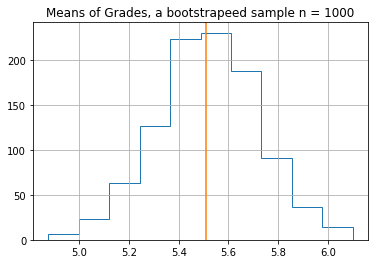

In [10]:
bootstrap.meangrade.hist(histtype='step')
plt.title("Means of Grades, a bootstrapeed sample n = 1000")
plt.axvline(pop.grade.mean(),color='C1')
plt.draw()

The mean is actually the same (if you think about it, it has to be). But there is significant spread around it. Let's extract the quantiles. 

In [11]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.110140678818241, 5.937076560010552)

Bootstrap approximated 95% confidence interval for the mean grade. It is between 5.1 and 5.9.

It seems that the mean grade is likely to be a passing one. The bootstrap procedure requires that the sample you have is representative. The procedure is justified by a rather complex mathematics and rather general assumptions. 

#### Xtra. 
For this case, show you that the guess is acceptable by showing you how I really generated the data set. The distribution that I used was actually a sum of two normal distributions with equal weights.

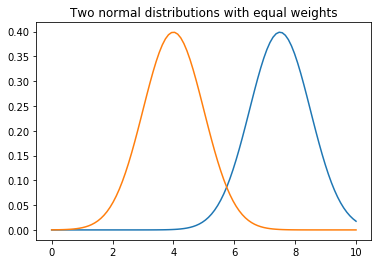

In [12]:
#use scipy.stats, play with distributions
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

#plot between 0 and 10
x = np.linspace(0,10,100)

plt.title("Two normal distributions with equal weights")
plt.plot(x,n1.pdf(x))
plt.plot(x,n2.pdf(x))
plt.draw()

For a scipy.stats distribution object, PDF, returns the probability density.

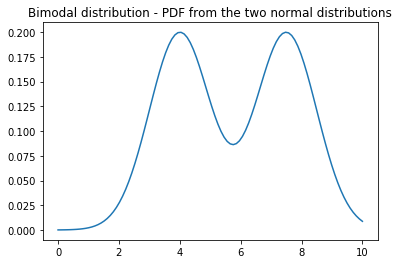

In [13]:
plt.plot(x,0.5*n1.pdf(x) + 0.5*n2.pdf(x))
plt.title("Bimodal distribution - PDF from the two normal distributions")
plt.draw()

This is a bimodal distribution. I also truncated this distribution, because there can't be grades below 0 or above 10. 

Make a function to draw a sample grade. I have a scipy.stats distribution object just so it turns a random sample from that distribution.

In [14]:
def draw():
    while True:
        #need to choose between the two, by drawing a uniform distributing number between 0 and 1 and 
        #comparing it with .5
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [15]:
#try once
draw()

3.038599750205621

Make a data set by calling this repeatedly.

In [16]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

Let's histogram a few of these samples. 

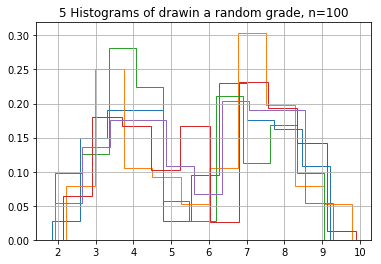

In [17]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)
plt.title("5 Histograms of drawin a random grade, n=100")
plt.draw()

And as for the sampling distribution of the mean, we can use simulation in a straightforward way.

In [18]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

Let's look at the histogram and compare with the bootstrapped distribution. 

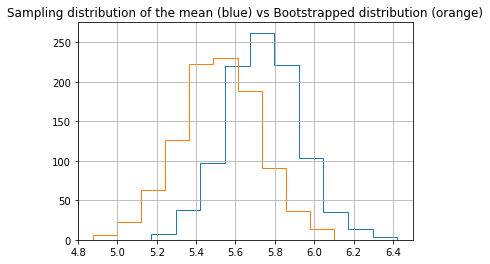

In [19]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')
plt.title("Sampling distribution of the mean (blue) vs Bootstrapped distribution (orange)")
plt.draw()

We see that the sampling distribution is displaced on the bootstrap estimate, but the spreads are comparable, which justifies our approximated confidence interval.